# AoC 2018 Day 12: Subterranean Sustainability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from day12 import *

## Part 2
We need to compute the score at `n_gen=50000000000`. It would take years to compute the score iteratively. But there maybe some regularity after some iterations (we keep going on the same patterns over and over again).

Let's inspect that.

In [3]:
test_init, test_dict = parse_input("day12_test_input.txt")

I change the function to compute the score to a generator, to keep all the values.

In [4]:
def play_gen(init, next_dict, n_gen=20):
    state = init
    yield compute_score(state, 0)
    for zero_ind in tqdm(range(0, 2 * n_gen, 2)):
        state = next_gen(state, next_dict)
        yield compute_score(state, zero_ind + 2)

In [5]:
scores_df = pd.DataFrame()

100%|██████████| 1000/1000 [00:00<00:00, 1306.31it/s]


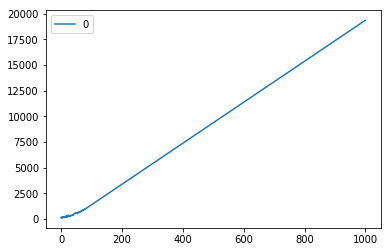

In [6]:
pd.DataFrame([score for score in play_gen(test_init, test_dict, 1000)]).plot();

The score is linear after some iterations. Let's inspect that with the real input.

In [7]:
init, next_dict = parse_input("day12_input.txt")

In [8]:
scores_df = pd.DataFrame({'scores': [score for score in play_gen(init, next_dict, 1000)]})

100%|██████████| 1000/1000 [00:00<00:00, 1184.21it/s]


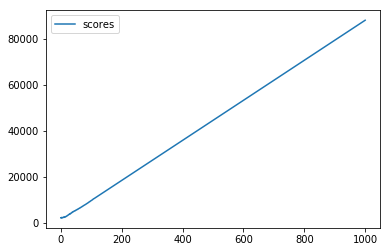

In [9]:
scores_df.plot();

In [10]:
scores_df.loc[100:1000:100, "scores"]

100      9600
200     18357
300     27057
400     35757
500     44457
600     53157
700     61857
800     70557
900     79257
1000    87957
Name: scores, dtype: int64

We see that the slope is `(87957 - 18357) / 800 = 87` and the intercept is `957`.

In [11]:
def get_score(x):
    return 87 * x + 957

In [12]:
assert get_score(800) == 70557
assert get_score(1000) == 87957

In [13]:
get_score(50000000000)

4350000000957

The answer is 4350000000957!